# WD Cooling

We can plot the cooling curve of a MESA 1 $M_\odot$ model to understand WD cooling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

In [2]:
profile = mr.MesaData("M1_default_profile8.data")
history = mr.MesaData("M1_default_trimmed_history.data")

Let's first plot the HR diagram

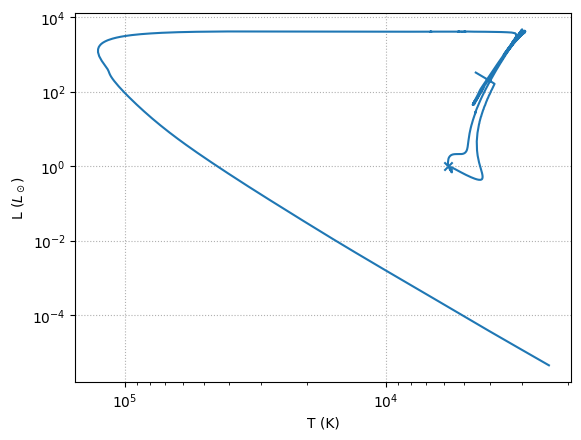

In [3]:
fig, ax = plt.subplots()

ax.loglog(history.Teff, history.L)
ax.scatter([profile.Teff], [profile.photosphere_L], marker="x")

ax.set_xlabel("T (K)")
ax.set_ylabel(r"L ($L_\odot$)")
ax.invert_xaxis()

ax.grid(linestyle=":")

We clearly see the WD evolution in the lower left, as the luminosity drops to $\sim 10^{-5}~\mathrm{L_\odot}$.

Let's plot luminosity vs. time.  We just want to focus on the WD evolution, so let's find the index where the star first has a radius $\lt 0.1~R_\odot$.

In [4]:
idx = np.where(history.log_R < np.log10(0.05))[0][0]
idx

np.int64(13668)

In [5]:
t_wd = history.star_age[idx]

We'll plot time since becoming a WD

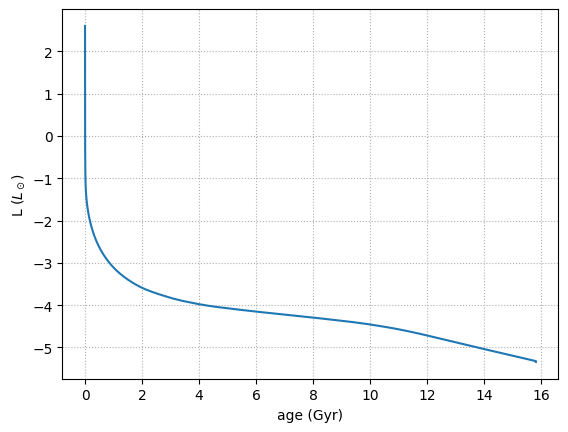

In [6]:
fig, ax = plt.subplots()

ax.plot((history.star_age[idx:] - t_wd)/ 1.e9, history.log_L[idx:])

ax.set_xlabel("age (Gyr)")
ax.set_ylabel(r"L $(L_\odot)$")
ax.grid(linestyle=":")

We can also plot the theoretical curve,

$$t_\mathrm{cool} = 6\times 10^6~\mathrm{yr} \left ( \frac{A}{12} \right )^{-1} 
  \left ( \frac{M}{M_\odot} \right )^{5/7} \left ( \frac{\mu}{2} \right )^{-2/7} 
  \left [ \left ( \frac{L_\star}{L_\odot} \right )^{-5/7} - \left ( \frac{L_0}{L_\odot} \right )^{-5/7} \right ]$$

We need $\mu$ and $A = \mu_I$, but these will vary throughout the star.  We can get
the mass fractions at the center and compute $\mu_I$---it seems that just ${}^{12}\mathrm{C}$, ${}^{16}\mathrm{O}$, and ${}^{20}\mathrm{Ne}$ is enough.  The
model also provides $Y_e = 1/\mu_e$.  We'll use the value at the end.

In [7]:
XC12 = history.center_c12[-1]
XO16 = history.center_o16[-1]
XNe20 = history.center_ne20[-1]
mu_i = 1.0 / (XC12 / 12 + XO16 / 16 + XNe20/20)
mu = 1.0 / (1.0 / mu_i + history.center_ye[-1])

The mass should not change, so we'll just take the final value.

In [8]:
M = history.star_mass[-1]

In [9]:
L = 10**history.log_L[idx:]
L0 = L[0]

Now we can compute the age based on the luminosity

In [10]:
t = 6.e6 * (12/mu_i) * M**(5./7.0) * (mu / 2)**(-2./7.) * (L**(-5./7.) - L0**(-5./7.)) / 1.e9

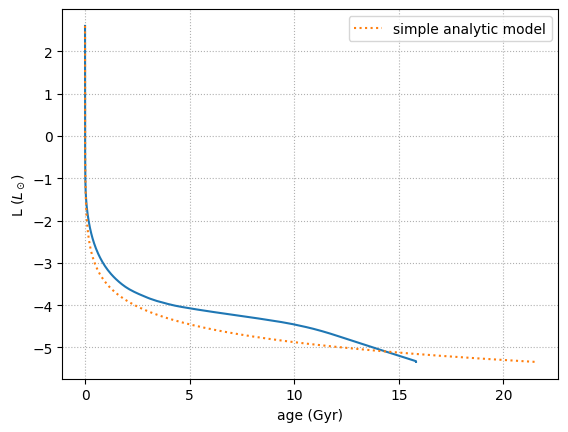

In [11]:
ax.plot(t, np.log10(L), ls=":", label="simple analytic model")
ax.legend()
fig

We seae that our analytic model cools to fast.  In addition to not including crystalization, we should also probably use an average over the star for the compositional quantities.